# Deep Learning
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_DL_CODE/blob/main/dl03_training_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Exercise 4

Build churn prediction model usin data from:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn/

copy of data avialable: data/churn.csv


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os, datetime
import numpy as np
# from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report   
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%load_ext tensorboard

In [2]:
df = pd.read_csv('data/churn.csv')
df.drop(columns=['customerID'], inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
map_dict = {'No': 0, 'No phone service':0, 'No internet service':0, 'Yes': 1, 'Male': 1, 'Female': 0}
df = df.applymap(lambda x: map_dict.get(x) if x in map_dict else x)
cat_cols = ['InternetService','Contract','PaymentMethod' ]
df =  pd.get_dummies(df, columns=cat_cols)
X = df.drop(columns=['Churn'])
y = df['Churn']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
m,n = X.shape
m,n

(7032, 26)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/7, random_state=42)

In [5]:
logdir = os.path.join("logs", "churn"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir,
                                                profile_batch=(100, 200))
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                    # start_from_epoch=10,
                                                     restore_best_weights=True)


2023-03-20 23:57:20.317378: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-20 23:57:20.317393: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-03-20 23:57:20.317726: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


In [6]:
import tensorflow as tf
from tensorflow import keras


model = tf.keras.Sequential(
    [
    tf.keras.layers.Dense(n, input_shape=(n,), activation="relu"),
    tf.keras.layers.Dense(n*2, activation="relu"),
    tf.keras.layers.Dense(n*2, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
    )

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],
              )
model.summary()


2023-03-20 23:57:20.346254: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-20 23:57:20.347007: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 52)                1404      
                                                                 
 dense_2 (Dense)             (None, 52)                2756      
                                                                 
 dense_3 (Dense)             (None, 1)                 53        
                                                                 
Total params: 4,915
Trainable params: 4,915
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train, y_train, epochs=100, callbacks=[tensorboard_cb, early_stopping_cb], validation_data=(X_val, y_val))

Epoch 1/100


2023-03-20 23:57:20.674574: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-20 23:57:20.979230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


120/162 [=====================>........] - ETA: 0s - loss: 0.4656 - accuracy: 0.7732

2023-03-20 23:57:22.893583: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-03-20 23:57:22.893602: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


162/162 [==============================] - ETA: 0s - loss: 0.4597 - accuracy: 0.7727

2023-03-20 23:57:24.025609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


162/162 [==============================] - 4s 14ms/step - loss: 0.4597 - accuracy: 0.7727 - val_loss: 0.4172 - val_accuracy: 0.8049
Epoch 2/100
 44/162 [=======>......................] - ETA: 1s - loss: 0.4123 - accuracy: 0.8089

2023-03-20 23:57:24.811930: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-03-20 23:57:24.840497: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-03-20 23:57:24.864158: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/churn20230320-235720/plugins/profile/2023_03_20_23_57_24

2023-03-20 23:57:24.885371: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/churn20230320-235720/plugins/profile/2023_03_20_23_57_24/192.168.1.5.trace.json.gz
2023-03-20 23:57:24.914527: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/churn20230320-235720/plugins/profile/2023_03_20_23_57_24

2023-03-20 23:57:24.917526: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs/churn20230320-235720/plugins/profile/2023_03_20_23_57_24/192.16

162/162 [==============================] - 2s 11ms/step - loss: 0.4249 - accuracy: 0.7977 - val_loss: 0.4067 - val_accuracy: 0.8095
Epoch 3/100
162/162 [==============================] - 1s 9ms/step - loss: 0.4151 - accuracy: 0.8051 - val_loss: 0.4047 - val_accuracy: 0.8269
Epoch 4/100
162/162 [==============================] - 1s 8ms/step - loss: 0.4103 - accuracy: 0.8120 - val_loss: 0.4033 - val_accuracy: 0.8235
Epoch 5/100
162/162 [==============================] - 1s 8ms/step - loss: 0.4053 - accuracy: 0.8142 - val_loss: 0.4081 - val_accuracy: 0.8153
Epoch 6/100
162/162 [==============================] - 1s 8ms/step - loss: 0.4030 - accuracy: 0.8113 - val_loss: 0.3977 - val_accuracy: 0.8235
Epoch 7/100
162/162 [==============================] - 1s 8ms/step - loss: 0.3965 - accuracy: 0.8148 - val_loss: 0.4004 - val_accuracy: 0.8293
Epoch 8/100
162/162 [==============================] - 1s 9ms/step - loss: 0.3947 - accuracy: 0.8163 - val_loss: 0.3981 - val_accuracy: 0.8188
Epoch 9/10

In [8]:
%tensorboard --logdir logs

24/32 [=====================>........] - ETA: 0s

2023-03-20 23:57:56.350153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

       false       0.83      0.89      0.86       737
        true       0.61      0.48      0.54       268

    accuracy                           0.78      1005
   macro avg       0.72      0.69      0.70      1005
weighted avg       0.77      0.78      0.77      1005



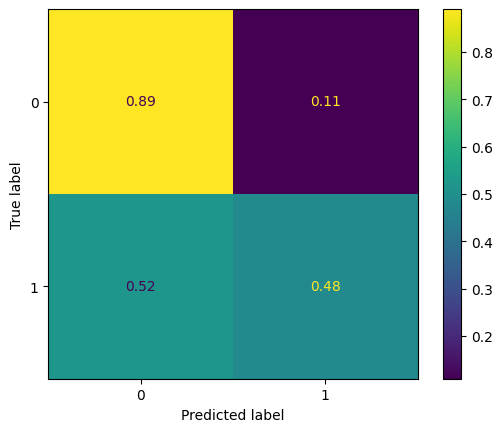

In [9]:
y_test_pred = model.predict(X_test)>0.5
print(classification_report(y_test,y_test_pred,target_names=['false','true']))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize='true')
plt.show()

<img src="data/comp.png"/>
